In [1]:
import pandas as pd

**0.** Podle Keplerových zákonů by pro všechny planety měl být konstantní poměr mezi třetí mocninou velké poloosy elipsy oběžné dráhy a druhou mocninou oběžné doby. Dokážeš to ověřit pomocí tabulky planety, kterou jsme si v hodině vytvořili?

In [2]:
planety = pd.read_csv("eda2/pandas_types/planety.csv")
planety

,jmeno,symbol,obezna_poloosa,obezna_doba,mesice,je_obr
0,Merkur,☿,0.39,0.24,0,False
1,Venuše,♀,0.72,0.62,0,False
2,Země,⊕,1.00,1.00,1,False
3,Mars,♂,1.52,1.88,2,False
4,Jupiter,♃,5.20,11.86,79,True
5,Saturn,♄,9.54,29.46,82,True
6,Uran,♅,19.22,84.01,27,True
7,Neptun,♆,30.06,164.80,14,True


In [3]:
(planety["obezna_poloosa"] ** 3) / (planety["obezna_doba"] ** 2)

0    1.029844
1    0.970989
2    1.000000
3    0.993608
4    0.999633
5    1.000414
6    1.006000
7    1.000121
dtype: float64

**1.** Vytvoř vhodný graf, který velkou poloosu elipsy a oběžnou dobu spojuje.

In [4]:
%matplotlib inline

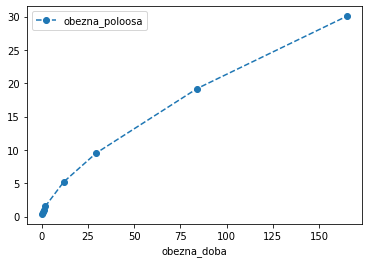

In [5]:
planety.plot.line(
    x="obezna_doba",
    y="obezna_poloosa",
    style="--",
    marker="o"
);

**2.** Přidej do tabulky zemí sloupce women_overweight, men_overweight, kde nadváhou zástupců příslušného pohlaví myslíme průměrné bmi > 25.

In [6]:
countries = pd.read_csv("countries.csv")
countries.columns

Index(['name', 'iso', 'world_6region', 'world_4region', 'income_groups',
       'is_eu', 'is_oecd', 'eu_accession', 'year', 'area', 'population',
       'alcohol_adults', 'bmi_men', 'bmi_women',
       'car_deaths_per_100000_people', 'calories_per_day', 'infant_mortality',
       'life_expectancy', 'life_expectancy_female', 'life_expectancy_male',
       'un_accession'],
      dtype='object')

In [7]:
countries_bmi = countries.assign(
    women_overweight = countries["bmi_women"] > 25,
    men_overweight = countries["bmi_men"] > 25)
countries_bmi[["women_overweight", "men_overweight"]]

,women_overweight,men_overweight
0,False,False
1,True,True
2,True,False
3,True,True
4,False,False
...,...,...
188,True,True
189,False,False
190,True,False
191,False,False


**3.** Zjisti, v jakých zemích, které NEpatří do low_income group, mají průměrně méně než 3000 kalorií na den.



In [8]:
countries[(countries["income_groups"] != "low_income") & (countries["calories_per_day"] < 3000)]

,name,iso,world_6region,world_4region,income_groups,is_eu,is_oecd,eu_accession,year,area,...,alcohol_adults,bmi_men,bmi_women,car_deaths_per_100000_people,calories_per_day,infant_mortality,life_expectancy,life_expectancy_female,life_expectancy_male,un_accession
4,Angola,AGO,sub_saharan_africa,africa,upper_middle_income,False,False,NaN,2018,1246700.0,...,5.57,22.25,23.48,NaN,2473.0,96.0,65.19,64.939,59.213,1976-12-01
5,Antigua and Barbuda,ATG,america,americas,high_income,False,False,NaN,2018,440.0,...,8.17,25.77,27.51,NaN,2417.0,5.8,77.60,79.028,74.154,1981-11-11
7,Armenia,ARM,europe_central_asia,europe,lower_middle_income,False,False,NaN,2018,29740.0,...,13.66,25.36,27.13,7.899,2928.0,12.6,75.97,77.952,71.589,1992-03-02
11,Bahamas,BHS,america,americas,high_income,False,False,NaN,2018,13880.0,...,8.65,27.25,29.14,9.408,2670.0,9.9,74.10,78.894,72.905,1973-09-18
14,Barbados,BRB,america,americas,high_income,False,False,NaN,2018,430.0,...,6.42,26.38,29.22,8.770,2937.0,12.0,76.84,78.547,73.758,1966-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Vanuatu,VUT,east_asia_pacific,asia,lower_middle_income,False,False,NaN,2018,12190.0,...,0.96,26.79,28.46,NaN,2836.0,23.1,64.30,74.869,70.393,1981-09-15
188,Venezuela,VEN,america,americas,upper_middle_income,False,False,NaN,2018,912050.0,...,7.60,27.45,28.13,7.332,2631.0,12.9,75.91,79.079,70.950,1945-11-15
189,Vietnam,VNM,east_asia_pacific,asia,lower_middle_income,False,False,NaN,2018,330967.0,...,3.91,20.92,21.07,NaN,2745.0,17.3,74.88,81.203,72.003,1977-09-20
190,Yemen,YEM,middle_east_north_africa,asia,lower_middle_income,False,False,NaN,2018,527970.0,...,0.20,24.44,26.11,NaN,2223.0,33.8,67.14,66.871,63.875,1947-09-30


**4.** Napiš kód, který vytvoří graf bmi mužů a bmi žen v zemích EU. Zkus si pohrát i s parametry - nastav figsize, barvu...

In [9]:
eu_countries = countries[countries["is_eu"]]
eu_countries

,name,iso,world_6region,world_4region,income_groups,is_eu,is_oecd,eu_accession,year,area,...,alcohol_adults,bmi_men,bmi_women,car_deaths_per_100000_people,calories_per_day,infant_mortality,life_expectancy,life_expectancy_female,life_expectancy_male,un_accession
9,Austria,AUT,europe_central_asia,europe,high_income,True,True,1995-01-01,2018,83879.0,...,12.40,26.47,25.09,3.541,3768.0,2.9,81.84,84.249,79.585,1955-12-14
16,Belgium,BEL,europe_central_asia,europe,high_income,True,True,1952-07-23,2018,30530.0,...,10.41,26.76,25.14,5.427,3733.0,3.3,81.23,83.751,79.131,1945-12-27
25,Bulgaria,BGR,europe_central_asia,europe,upper_middle_income,True,False,2007-01-01,2018,111000.0,...,11.40,26.54,25.52,9.662,2829.0,9.3,75.32,78.485,71.618,1955-12-14
42,Croatia,HRV,europe_central_asia,europe,high_income,True,False,2013-01-01,2018,56590.0,...,15.00,26.60,25.18,6.434,3059.0,3.6,77.66,81.167,74.701,1992-05-22
44,Cyprus,CYP,europe_central_asia,europe,high_income,True,False,2004-05-01,2018,9250.0,...,8.84,27.42,25.93,6.419,2649.0,2.5,80.79,82.918,78.734,1960-09-20
45,Czechia,CZE,europe_central_asia,europe,high_income,True,True,2004-05-01,2018,78870.0,...,16.47,27.91,26.51,5.720,3256.0,2.8,79.37,81.858,76.148,1993-01-19
46,Denmark,DNK,europe_central_asia,europe,high_income,True,True,1973-01-01,2018,42922.0,...,12.02,26.13,25.11,3.481,3367.0,2.9,81.10,82.878,79.130,1945-10-24
55,Estonia,EST,europe_central_asia,europe,high_income,True,True,2004-05-01,2018,45230.0,...,17.24,26.26,25.19,5.896,3253.0,2.3,77.66,82.111,73.201,1991-09-17
58,Finland,FIN,europe_central_asia,europe,high_income,True,True,1995-01-01,2018,338420.0,...,13.10,26.73,25.58,3.615,3368.0,1.9,82.06,84.423,78.934,1955-12-14
59,France,FRA,europe_central_asia,europe,high_income,True,True,1952-07-23,2018,549087.0,...,12.48,25.85,24.83,2.491,3482.0,3.5,82.62,85.747,79.991,1945-10-24


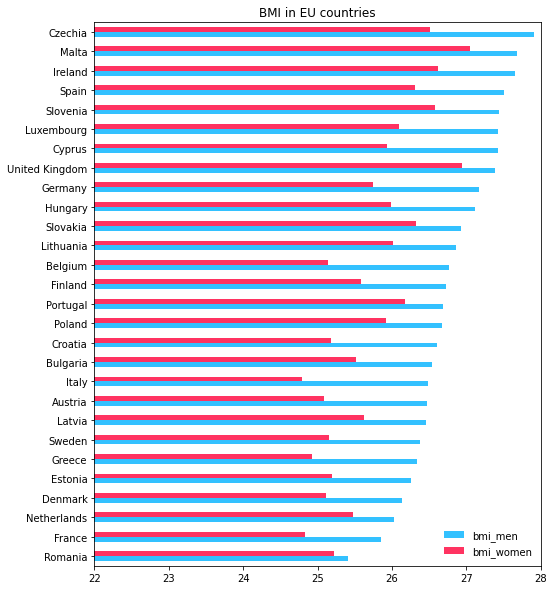

In [10]:
plt = eu_countries.sort_values("bmi_men").plot.barh(
    x="name",
    y=["bmi_men", "bmi_women"],
    title="BMI in EU countries",
    xlabel="",
    xlim=(22, 28),
    figsize=(8, 10),
    color=["#33C1FF", "#FF3361"],
);
plt.legend(
    loc='lower right',
    frameon=False)


**5.** Najdi si nějaká data, udělej z nich vizualizaci a postni ji na Slack do kanálu #projekty s informací, odkud jsi data bral/a a čeho se týkají. Pokud nevíš, zajímavá data najdeš například zde.